<a href="https://colab.research.google.com/github/sebekpro/OculusRiftInAction/blob/master/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)

![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)


### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).



### <a name='a2'></a> Import bibliotek

In [ ]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.18.0


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
print(X_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136 244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253 238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 253 237 200  57   

In [ ]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a>  Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

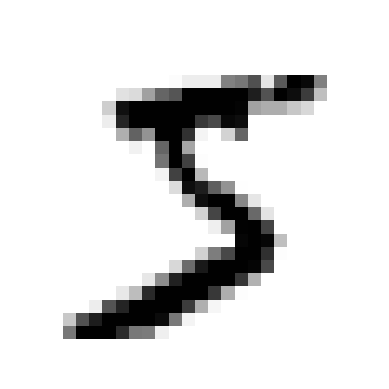

In [ ]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

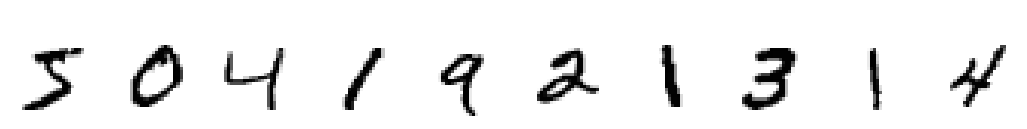

In [ ]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

### <a name='a5'></a>  Budowa sieci neuronowej

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### <a name='a6'></a> Trenowanie modelu

In [ ]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0412
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9880 - loss: 0.0339
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9896 - loss: 0.0312
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9902 - loss: 0.0300
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9900 - loss: 0.0304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9901 - loss: 0.0287
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9909 - loss: 0.0276
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9921 - loss: 0.0244
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9913 - loss: 0.0239
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9922 - loss: 0.0245


### <a name='a7'></a> Ocena modelu

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9812 - loss: 0.0781


[0.07809514552354813, 0.9811999797821045]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.985800,0.042788
1,0.987133,0.037303
2,0.988367,0.034020
3,0.989017,0.032961
4,0.988817,0.033070
5,0.989800,0.030265
6,0.989700,0.030265
7,0.990950,0.027412
8,0.990750,0.025811
9,0.991350,0.025862


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

### <a name='a8'></a> Predykcja na podstawie modelu

In [ ]:
y_prob = model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.            , 0.            , 0.000000000007, ..., 0.99999994    , 0.000000000003, 0.00000000073 ],
       [0.000000000001, 0.000000004232, 0.99999994    , ..., 0.            , 0.000000013545, 0.            ],
       [0.            , 0.9999928     , 0.000000597144, ..., 0.000005143966, 0.000001350286, 0.            ],
       ...,
       [0.            , 0.            , 0.            , ..., 0.00000000117 , 0.000000000023, 0.000000002704],
       [0.            , 0.            , 0.            , ..., 0.            , 0.000000000941, 0.            ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(y_test.shape)
print(y_pred.shape)

(10000,)
(10000,)


In [ ]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [ ]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([18, 247, 321, 340, 381, 445, 495, 552, 582, 613], dtype='int64')

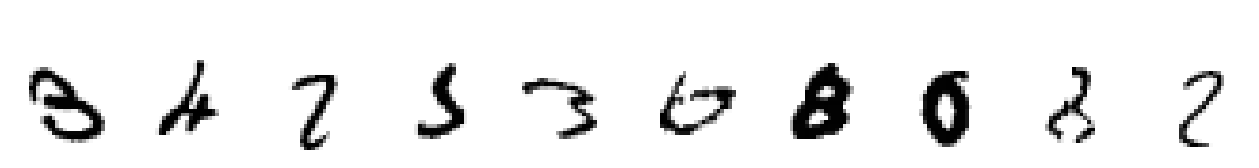

In [ ]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()